This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


2022-02-26 18:57:44.864369: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.66825634]
 [-0.9801852 ]
 [-2.243422  ]], shape=(3, 1), dtype=float32)


In [7]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.5965048 ]
 [0.8382418 ]
 [0.20854402]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [8]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


**Creating a TensorFlow variable**

In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.048729 ],
       [-1.1625144],
       [ 0.2626171]], dtype=float32)>


In [15]:
v2 = tf.Variable(initial_value=1.)
print(v2)
v2.assign(42.)
print(v2)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=42.0>


**Assigning a value to a TensorFlow variable**

In [16]:
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


**Assigning a value to a subset of a TensorFlow variable**

In [17]:
v[0, 0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


**Using `assign_add`**

In [24]:
v.assign_add(tf.ones((3, 1)))
print(v)
print(v + v ** 2)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[6.],
       [4.],
       [4.]], dtype=float32)>
tf.Tensor(
[[42.]
 [20.]
 [20.]], shape=(3, 1), dtype=float32)


#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [22]:
a = tf.ones((2, 2)) * 2
print('--- a\n', a)
b = tf.square(a)
print('--- b\n', b)
c = tf.sqrt(a)
print('--- c\n', c)
d = b + c
print('--- d\n', d)
e = tf.matmul(a, b)
print('--- e\n', e)
e = a @ b
print('--- e\n', e)
e *= d
print('--- e\n', e)

--- a
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
--- b
 tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
--- c
 tf.Tensor(
[[1.4142135 1.4142135]
 [1.4142135 1.4142135]], shape=(2, 2), dtype=float32)
--- d
 tf.Tensor(
[[5.4142137 5.4142137]
 [5.4142137 5.4142137]], shape=(2, 2), dtype=float32)
--- e
 tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
--- e
 tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
--- e
 tf.Tensor(
[[86.62742 86.62742]
 [86.62742 86.62742]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [28]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
    # result = input_var * input_var
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [32]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order gradients**

In [33]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [46]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

print(negative_samples)
print(positive_samples)

[[-0.38956815  3.49131235]
 [ 0.71556562  2.70185618]
 [-0.57587092  4.11700031]
 ...
 [-0.93613572  1.97275326]
 [ 0.52498753  3.60792599]
 [ 0.43214885  3.19683855]]
[[ 1.06803523 -1.68311895]
 [ 2.4048261  -1.22734988]
 [ 4.26992019 -0.05421686]
 ...
 [ 0.82031753 -2.23396975]
 [ 3.27206286  0.53806419]
 [ 2.29602503 -0.64761156]]


**Stacking the two classes into an array with shape (2000, 2)**

In [47]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs)

[[-0.38956815  3.4913123 ]
 [ 0.7155656   2.7018561 ]
 [-0.57587093  4.117     ]
 ...
 [ 0.8203175  -2.2339697 ]
 [ 3.2720628   0.5380642 ]
 [ 2.296025   -0.64761156]]


**Generating the corresponding targets (0 and 1)**

In [48]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


**Plotting the two point classes**

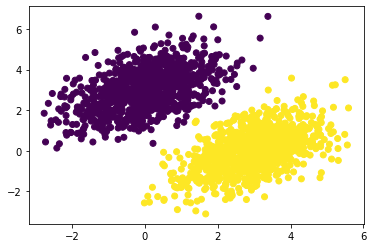

In [50]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [51]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [52]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [53]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [54]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [55]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.2068
Loss at step 1: 0.8075
Loss at step 2: 0.2361
Loss at step 3: 0.1528
Loss at step 4: 0.1333
Loss at step 5: 0.1229
Loss at step 6: 0.1143
Loss at step 7: 0.1066
Loss at step 8: 0.0995
Loss at step 9: 0.0931
Loss at step 10: 0.0872
Loss at step 11: 0.0818
Loss at step 12: 0.0769
Loss at step 13: 0.0723
Loss at step 14: 0.0682
Loss at step 15: 0.0644
Loss at step 16: 0.0610
Loss at step 17: 0.0578
Loss at step 18: 0.0549
Loss at step 19: 0.0523
Loss at step 20: 0.0499
Loss at step 21: 0.0477
Loss at step 22: 0.0456
Loss at step 23: 0.0438
Loss at step 24: 0.0421
Loss at step 25: 0.0406
Loss at step 26: 0.0391
Loss at step 27: 0.0378
Loss at step 28: 0.0367
Loss at step 29: 0.0356
Loss at step 30: 0.0346
Loss at step 31: 0.0337
Loss at step 32: 0.0329
Loss at step 33: 0.0321
Loss at step 34: 0.0314
Loss at step 35: 0.0308
Loss at step 36: 0.0302
Loss at step 37: 0.0297
Loss at step 38: 0.0292
Loss at step 39: 0.0287


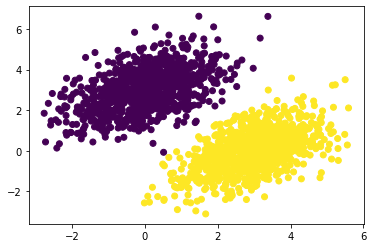

In [56]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

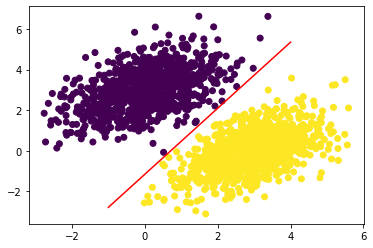

In [57]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [0]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [0]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Automatic shape inference: Building layers on the fly

In [0]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [0]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [0]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [0]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [0]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [0]:
history.history

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [0]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

### Inference: Using a model after training

In [0]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

## Summary